# Laptop Price Prediction

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data Set

In [68]:
df=pd.read_csv('laptop-price.csv' , index_col=0)

In [69]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
index,,,,,,,,,,,,,,,
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64,Intel,Windows


### Summary Statistics

In [40]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'Cpu brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')

In [41]:
df.shape

(1268, 15)

In [42]:
df.describe()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
count,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000
mean,8.461356,2.080047,59924.981175,0.145110,0.282334,145.935819,415.741325,183.634069,9.075710,4.580442
std,5.569898,0.806482,37340.350650,0.352351,0.450313,43.445969,517.152677,186.641125,93.825228,30.615945
min,1.000000,0.690000,9270.720000,0.000000,0.000000,44.019462,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.000000,127.335675,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.000000,141.211998,0.000000,256.000000,0.000000,0.000000
75%,8.000000,2.320000,79346.840400,0.000000,1.000000,157.350512,1000.000000,256.000000,0.000000,0.000000
max,64.000000,11.100000,324954.720000,1.000000,1.000000,352.465147,2000.000000,1024.000000,1000.000000,512.000000


In [43]:
df.dtypes

Company           object
TypeName          object
Ram                int64
Weight           float64
Price            float64
Touchscreen        int64
Ips                int64
ppi              float64
Cpu brand         object
HDD                int64
SSD                int64
Hybrid             int64
Flash_Storage      int64
Gpu brand         object
os                object
dtype: object

### checking null values

In [44]:
df.isnull().sum()

Company          0
TypeName         0
Ram              0
Weight           0
Price            0
Touchscreen      0
Ips              0
ppi              0
Cpu brand        0
HDD              0
SSD              0
Hybrid           0
Flash_Storage    0
Gpu brand        0
os               0
dtype: int64

# Exploratory Data Analysis (EDA)

### Price Correction 
 - Since price is in INR we have to Convert it into PKR
 - 1 INR is Equal to 3.28 PKR

In [70]:
df['Price']=df['Price'] * 3.28

In [71]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
index,,,,,,,,,,,,,,,
0,Apple,Ultrabook,8,1.37,234122.080896,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,157097.316096,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,100486.080000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,443440.702080,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,315194.250240,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


### Price Distribution

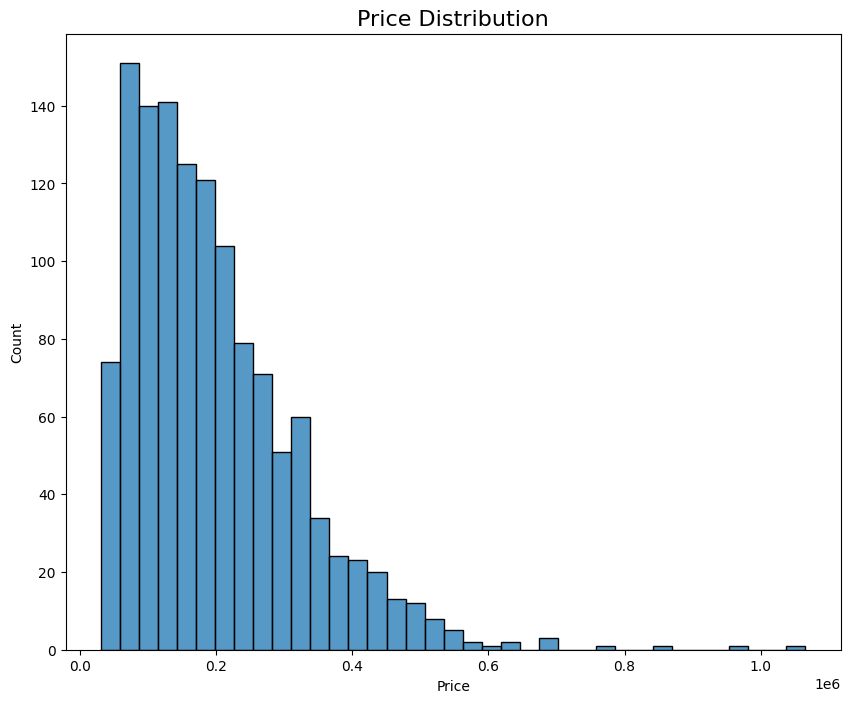

In [47]:
plt.figure(figsize=(10,8))
sns.histplot(
    data=df,
    x='Price'
)
plt.title('Price Distribution' ,fontsize=16)
plt.show()

In [48]:
#most expensive laptops

most_expensive = df.loc[df['Price'].idxmax()]
print(most_expensive[['Company' , 'Price']])

Company           Razer
Price      1065851.4816
Name: 196, dtype: object


In [49]:
# most cheapest Laptop

most_cheapest=df.loc[df['Price'].idxmin()]
print(most_cheapest[['Company' , 'Price']])

Company          Acer
Price      30407.9616
Name: 1215, dtype: object


### Checking for outliers

In [50]:
Q1 =  df['Price'].quantile(0.25)
Q3 =  df['Price'].quantile(0.75)

Iqr = Q3 - Q1

Lower_bound=Q1 - 1.5 * Iqr
Upper_bound=Q3 + 1.5 * Iqr

outliers = df[(df['Price'] < Lower_bound) | (df['Price'] > Upper_bound)]

print('Outliers are ')
print(outliers)

Outliers are 
      Company     TypeName  Ram  Weight         Price  Touchscreen  Ips  \
index                                                                     
17      Apple    Ultrabook   16    1.83  4.994595e+05            0    1   
196     Razer       Gaming   32    3.49  1.065851e+06            1    0   
204      Dell  Workstation   16    2.80  5.338869e+05            0    0   
238      Asus       Gaming   32    4.70  6.798102e+05            0    0   
247      Asus       Gaming   16    3.60  5.241004e+05            0    0   
297      Dell  Workstation   16    3.42  5.041535e+05            0    0   
517      Asus       Gaming   24    2.24  5.186829e+05            0    0   
530      Dell       Gaming   16    4.42  5.265069e+05            0    1   
563    Lenovo     Notebook    8    3.40  5.241004e+05            0    1   
610    Lenovo     Notebook   32    2.50  8.561414e+05            0    1   
659      Dell       Gaming   32    4.42  5.500293e+05            0    1   
723      De

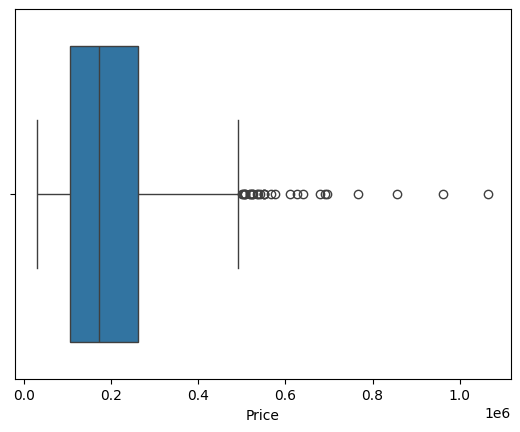

In [51]:
sns.boxplot(
    x=df['Price']
)
plt.show()

### Average Price Company

C:\Users\progr\AppData\Local\Temp\ipykernel_3512\373912292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


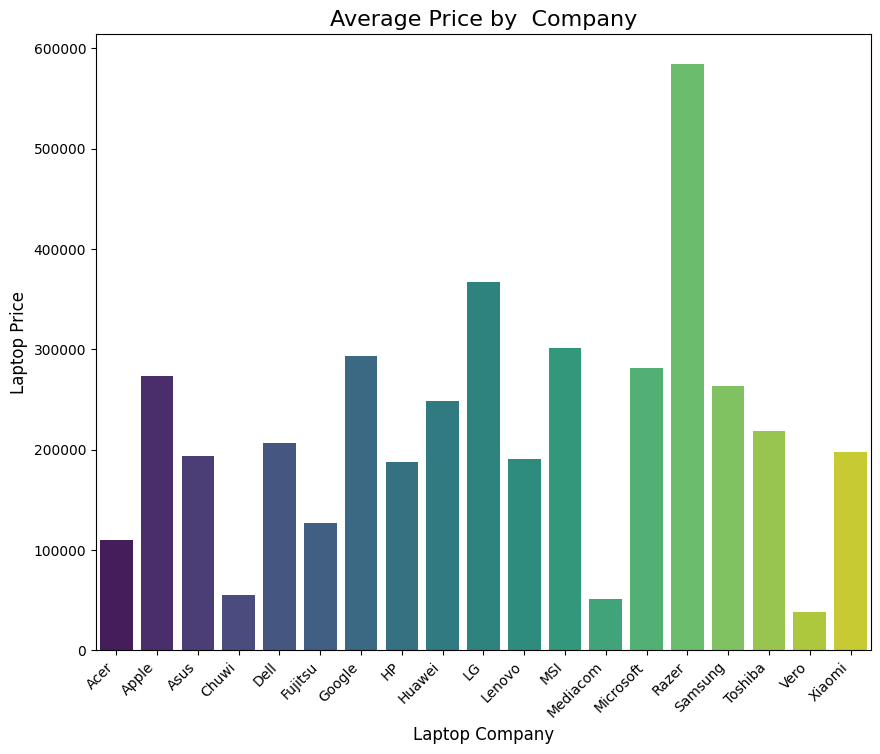

In [52]:
avrg_price=df.groupby('Company')['Price'].mean().reset_index()

plt.figure(figsize=(10,8))

sns.barplot(
    data=avrg_price,
    x='Company',
    y='Price',
    palette='viridis'
)

plt.title('Average Price by  Company' , fontsize=16)
plt.xlabel('Laptop Company' , fontsize=12)
plt.ylabel('Laptop Price',fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()

### Most Common Specification

In [53]:
most_common_ram=df['Ram'].value_counts()
most_common_ssd=df['SSD'].value_counts()

print('Most common Ram')
print(most_common_ram)
print('\nMost common SSD')
print(most_common_ssd)

Most common Ram
Ram
8     598
4     366
16    193
6      40
12     25
2      22
32     17
64      3
24      3
1       1
Name: count, dtype: int64

Most common SSD
SSD
256     483
0       448
128     168
512     136
1000     15
32        6
180       4
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64


### Correlation b/w Variables : 
 - **Correlation** helps measure the relationship between variables, showing how one variable changes concerning another.
 - I am analyzing the correlation between laptop features (like Price, RAM, SSD, and PPI) to understand their impact on price and identify significant trends or patterns.

Correlation Matrix:
          Price       Ram       SSD       ppi
Price  1.000000  0.687127  0.668765  0.471284
Ram    0.687127  1.000000  0.570047  0.291502
SSD    0.668765  0.570047  1.000000  0.506248
ppi    0.471284  0.291502  0.506248  1.000000


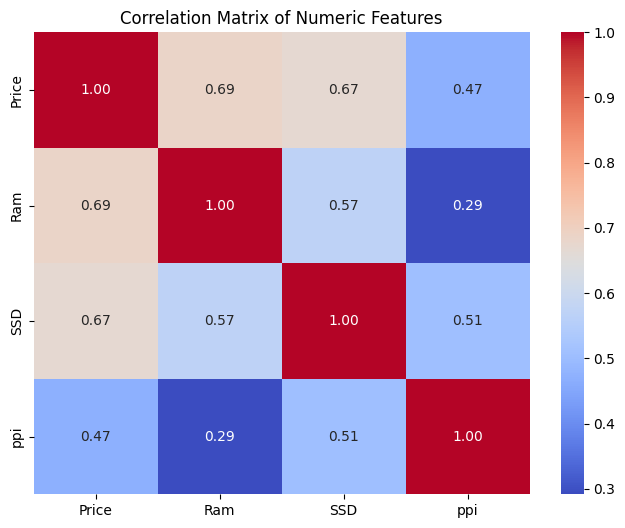

In [54]:
from sklearn.preprocessing import LabelEncoder

# Correlation Analysis for numeric features
numeric_features = ['Price', 'Ram', 'SSD', 'ppi']
correlation_matrix = df[numeric_features].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


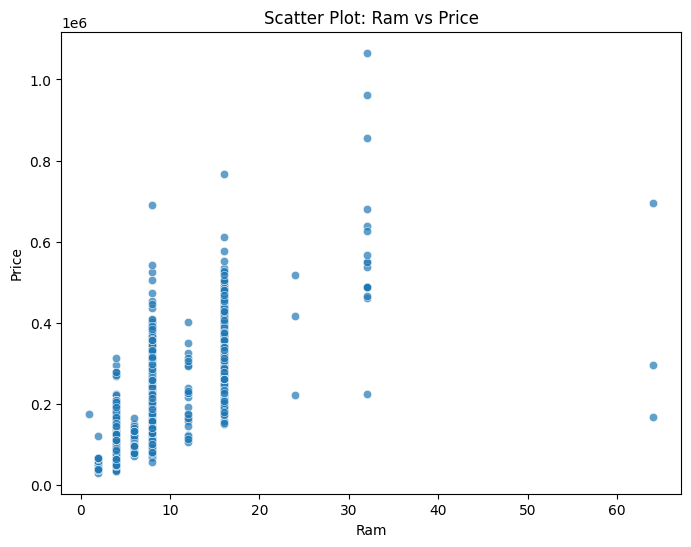

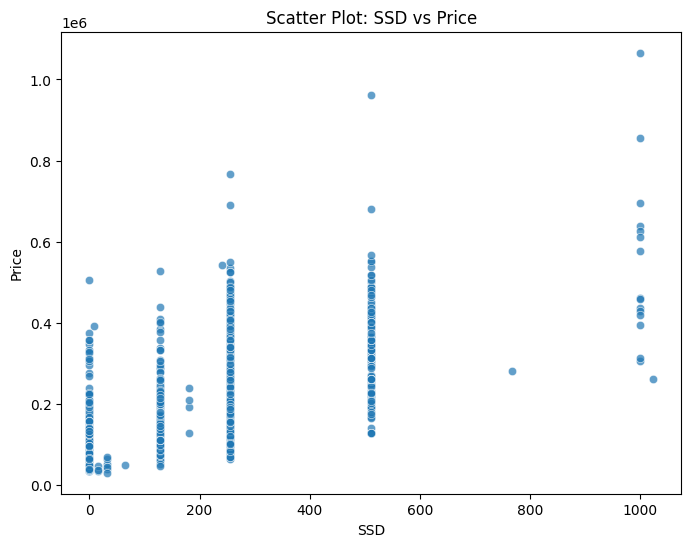

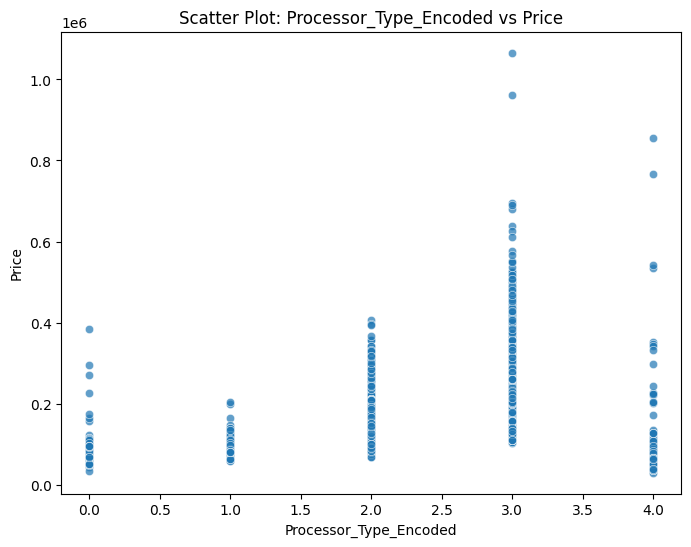

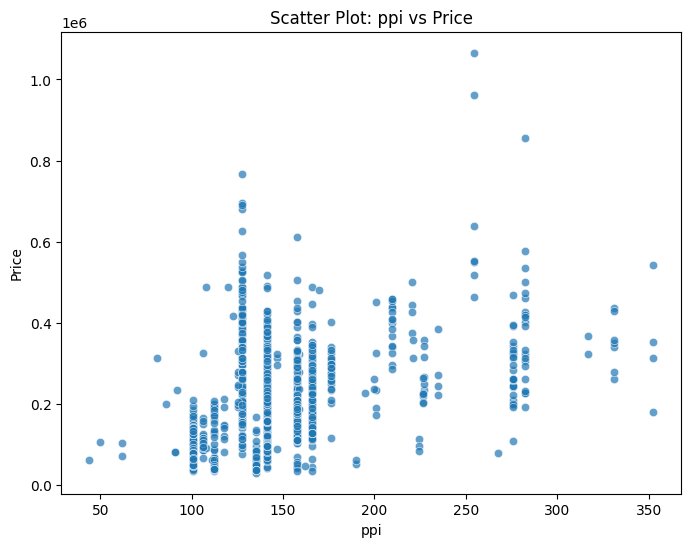

In [55]:
# Encoding categorical data (e.g., Processor_Type)
label_encoder = LabelEncoder()
df['Processor_Type_Encoded'] = label_encoder.fit_transform(df['Cpu brand'])

# Scatter Plots
features_to_plot = ['Ram', 'SSD', 'Processor_Type_Encoded', 'ppi']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='Price', alpha=0.7)
    plt.title(f"Scatter Plot: {feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

### Laptop price according to it's Type

C:\Users\progr\AppData\Local\Temp\ipykernel_3512\1586278336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TypeName', y='Price', palette='Set2')


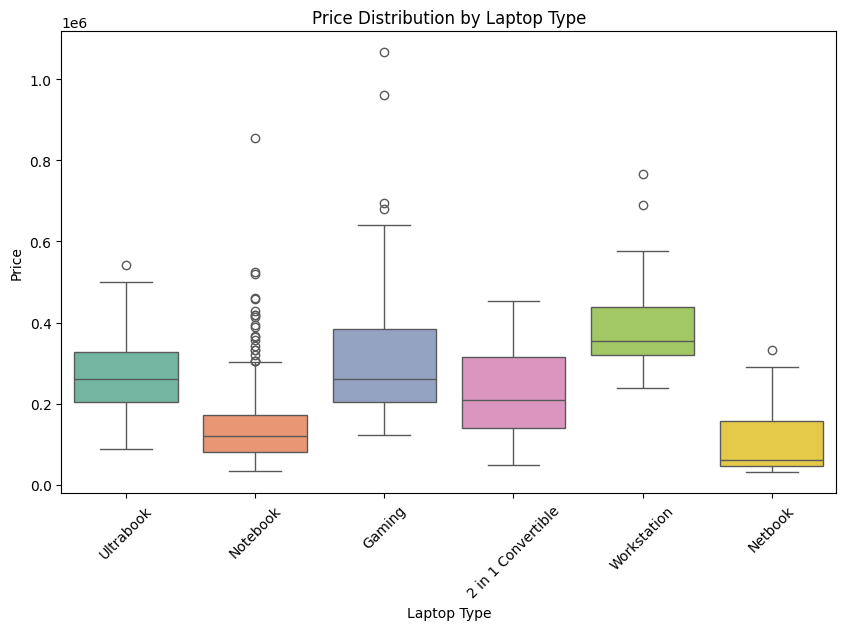

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TypeName', y='Price', palette='Set2')
plt.title("Price Distribution by Laptop Type")
plt.xlabel("Laptop Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

## Advance Analysis
 - Advanced analysis involves evaluating price-performance ratios, calculating value-for-money scores, and comparing brands based on key features like RAM, SSD, and processor efficiency to identify the best options for consumers.


## Value For Money

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Features to consider for performance
performance_features = ['Ram', 'SSD', 'ppi', 'Weight']

# Normalize performance features
scaler = MinMaxScaler()
df[performance_features] = scaler.fit_transform(df[performance_features])

# Calculate a performance score (weighted sum of features)
df['Performance_Score'] = (
    0.4 * df['Ram'] +         # Weight RAM higher
    0.3 * df['SSD'] +         # Weight SSD slightly lower
    0.2 * df['ppi'] +         # Add ppi
    0.1 * df['Weight']        # Add weight
)

# Calculate value-for-money score
df['Value_for_Money'] = df['Performance_Score'] / df['Price']

# Average value-for-money score by brand
value_for_money_by_brand = df.groupby('Company')['Value_for_Money'].mean().sort_values(ascending=False)

print("Value for Money by Brand:")
print(value_for_money_by_brand)


Value for Money by Brand:
Company
Vero         2.381985e-06
Chuwi        2.224923e-06
Mediacom     2.129407e-06
Fujitsu      1.254794e-06
Acer         1.229873e-06
Lenovo       1.096187e-06
Xiaomi       1.087026e-06
Asus         1.063890e-06
Huawei       1.045139e-06
HP           9.936190e-07
Dell         9.825570e-07
Google       9.386005e-07
Razer        9.108398e-07
Samsung      8.762972e-07
Toshiba      8.529378e-07
Microsoft    7.866187e-07
Apple        7.835930e-07
LG           7.722339e-07
MSI          7.679958e-07
Name: Value_for_Money, dtype: float64


#### Bar plot for Value for Money Score

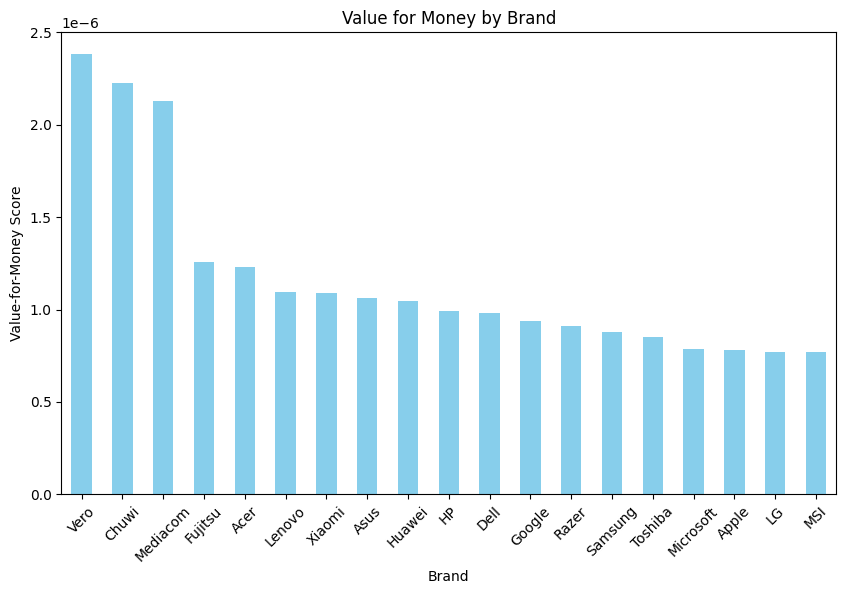

In [58]:
plt.figure(figsize=(10, 6))
value_for_money_by_brand.plot(kind='bar', color='skyblue')
plt.title("Value for Money by Brand")
plt.xlabel("Brand")
plt.ylabel("Value-for-Money Score")
plt.xticks(rotation=45)
plt.show()

## Visualizing  Some Insights

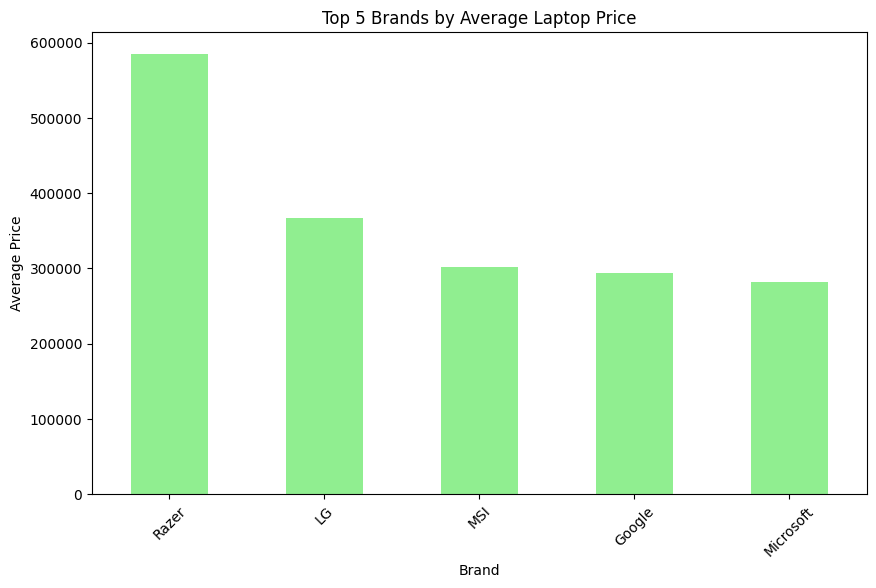

In [59]:
avg_price_by_brand = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

top_5_brands = avg_price_by_brand.head(5)

plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar', color='lightgreen')
plt.title("Top 5 Brands by Average Laptop Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


C:\Users\progr\AppData\Local\Temp\ipykernel_3512\211881395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TypeName', y='Price', palette='muted', inner='quartile')


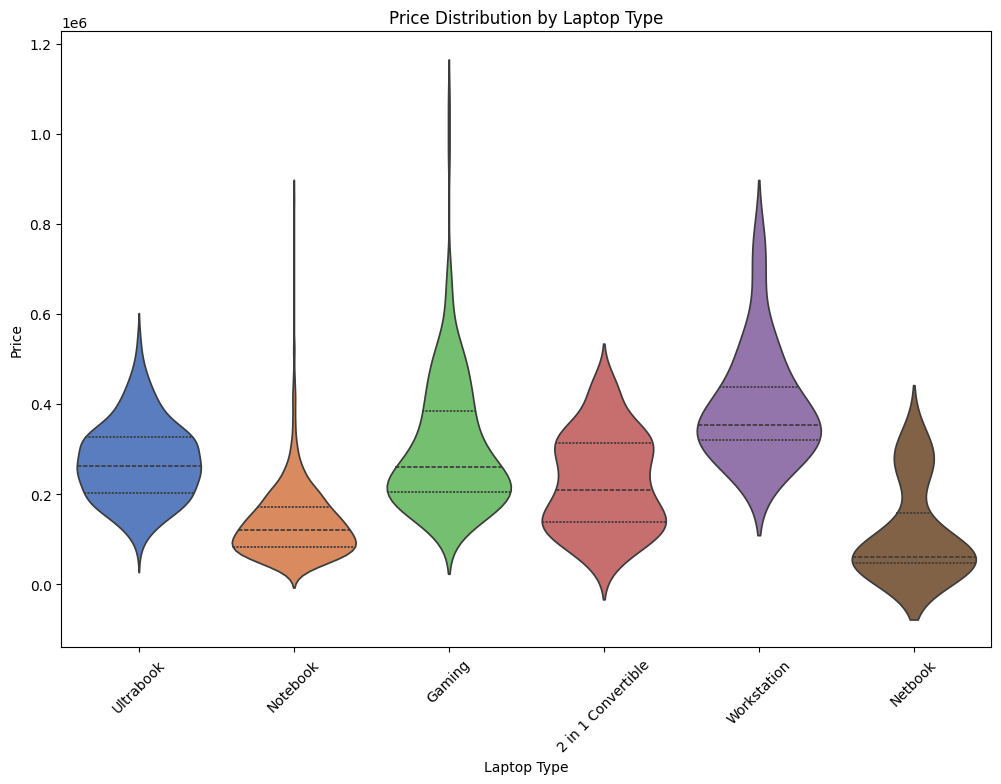

In [60]:
# Violin plot for price distribution by configurations (e.g., Laptop Type)
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='TypeName', y='Price', palette='muted', inner='quartile')
plt.title("Price Distribution by Laptop Type")
plt.xlabel("Laptop Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


### Price Distribution by Operating System

In [61]:
os_price_stats = df.groupby('os')['Price'].agg(['min', 'max', 'mean', 'std']).sort_values(by='mean', ascending=False)

print("Price Statistics by Operating System:")
print(os_price_stats)

Price Statistics by Operating System:
                              min           max           mean            std
os                                                                           
Mac                 157097.316096  4.994595e+05  273356.839625   98148.440936
Windows              34252.646400  1.065851e+06  207773.879705  123960.439337
Others/No OS/Linux   30407.961600  3.842937e+05  104435.284211   54389.323718


C:\Users\progr\AppData\Local\Temp\ipykernel_3512\1232078340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='os', y='Price', palette='Set2')


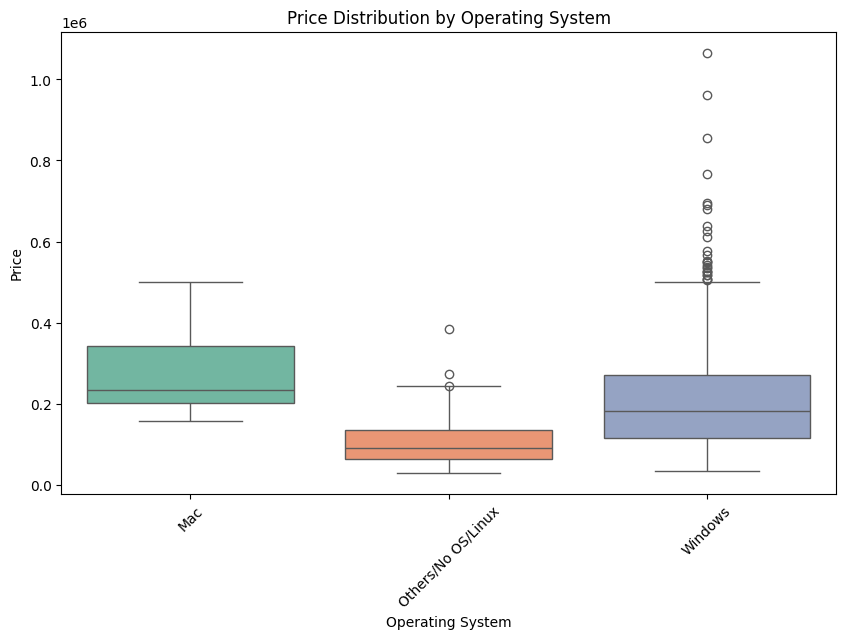

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='os', y='Price', palette='Set2')
plt.title("Price Distribution by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()